In [93]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [94]:
df = pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,Country,Total Library Size,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Density (P/Km²),2018
0,0,Argentina,4760,3.74,6.30,9.26,17,20610.568550
1,1,Austria,5640,9.03,14.67,20.32,109,55454.689290
2,2,Bolivia,4991,7.99,10.99,13.99,11,7873.166243
3,3,Bulgaria,6797,9.03,11.29,13.54,64,21960.369940
4,4,Chile,4994,7.07,9.91,12.74,26,25222.527780
5,5,Colombia,4991,4.31,6.86,9.93,46,15012.930270
6,6,Costa Rica,4988,8.99,12.99,15.99,100,17671.095350
7,7,Croatia,2274,9.03,11.29,13.54,73,27579.780830
8,9,Ecuador,4992,7.99,10.99,13.99,71,11734.387390
9,10,Estonia,6456,9.03,11.29,13.54,31,35973.776460


In [95]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.preprocessing import OrdinalEncoder # to encode categorical variables
from sklearn.neighbors import KNeighborsClassifier # for KNN classification
from sklearn.neighbors import KNeighborsRegressor # for KNN regression
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
scaler = MinMaxScaler()
df['Density (P/Km²)']=scaler.fit_transform(df[['Density (P/Km²)']])
df['2018']=scaler.fit_transform(df[['2018']])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train=df_train[['Density (P/Km²)', '2018']]
X_test=df_test[['Density (P/Km²)', '2018']]
y_train=df_train['Cost Per Month - Basic ($)']
y_test=df_test['Cost Per Month - Basic ($)']
model = KNeighborsRegressor(n_neighbors=14, weights='uniform', algorithm='auto', metric_params=None, n_jobs=-1)
reg = model.fit(X_train, y_train)
pred_values_tr = model.predict(X_train)
pred_values_te = model.predict(X_test)
print('****************** KNN Regression ******************')    
print("")
scoreR_te = model.score(X_test, y_test)
print('Test Accuracy Score: ', scoreR_te)
scoreR_tr = model.score(X_train, y_train)
print('Training Accuracy Score: ', scoreR_tr)
print('---------------------------------------------------------')

****************** KNN Regression ******************

Test Accuracy Score:  0.14951658687738745
Training Accuracy Score:  0.2629718392933811
---------------------------------------------------------


In [97]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.9123587233260486
RMSE value for k=  2 is: 2.9289147592012075
RMSE value for k=  3 is: 3.021373553228423
RMSE value for k=  4 is: 3.0374692213804133
RMSE value for k=  5 is: 2.9747536592688366
RMSE value for k=  6 is: 2.8965041988704376
RMSE value for k=  7 is: 2.8934882027739177
RMSE value for k=  8 is: 2.873779428405214
RMSE value for k=  9 is: 2.911865271976009
RMSE value for k=  10 is: 2.9097361134645867
RMSE value for k=  11 is: 2.9233790215401876
RMSE value for k=  12 is: 2.884981936765456
RMSE value for k=  13 is: 2.8354834109142697
RMSE value for k=  14 is: 2.807624042425453
RMSE value for k=  15 is: 2.8106381969357197
RMSE value for k=  16 is: 2.8300902989587486
RMSE value for k=  17 is: 2.836665363836533
RMSE value for k=  18 is: 2.8591590608043176
RMSE value for k=  19 is: 2.8350967599082884
RMSE value for k=  20 is: 2.832496561486586


<AxesSubplot:>

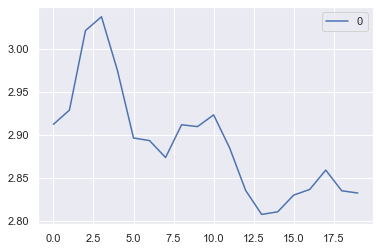

In [98]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [99]:
scaler = MinMaxScaler()
df['Density (P/Km²)']=scaler.fit_transform(df[['Density (P/Km²)']])
df['2018']=scaler.fit_transform(df[['2018']])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train=df_train[['Density (P/Km²)', '2018']]
X_test=df_test[['Density (P/Km²)', '2018']]
y2_train=df_train['Cost Per Month - Standard ($)']
y2_test=df_test['Cost Per Month - Standard ($)']
model = KNeighborsRegressor(n_neighbors=13, weights='uniform', algorithm='auto', metric_params=None, n_jobs=-1)
reg = model.fit(X_train, y2_train)
pred_values_tr = model.predict(X_train)
pred_values_te = model.predict(X_test)
print('****************** KNN Regression ******************')    
print("")
scoreR_te = model.score(X_test, y2_test)
print('Test Accuracy Score: ', scoreR_te)
scoreR_tr = model.score(X_train, y2_train)
print('Training Accuracy Score: ', scoreR_tr)
print('---------------------------------------------------------')

****************** KNN Regression ******************

Test Accuracy Score:  0.2860640866597264
Training Accuracy Score:  0.44508801456093183
---------------------------------------------------------


In [103]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y2_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y2_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 3.466125358379296
RMSE value for k=  2 is: 3.362444237455842
RMSE value for k=  3 is: 3.4151820622799187
RMSE value for k=  4 is: 3.4322287614367046
RMSE value for k=  5 is: 3.376864719430338
RMSE value for k=  6 is: 3.3298802600538506
RMSE value for k=  7 is: 3.300107630691712
RMSE value for k=  8 is: 3.305393635156536
RMSE value for k=  9 is: 3.3735849037604875
RMSE value for k=  10 is: 3.34799904171631
RMSE value for k=  11 is: 3.347987697908155
RMSE value for k=  12 is: 3.3337003964563667
RMSE value for k=  13 is: 3.2824096509075176
RMSE value for k=  14 is: 3.2899695465683174
RMSE value for k=  15 is: 3.3278609635308674
RMSE value for k=  16 is: 3.3756832063117233
RMSE value for k=  17 is: 3.369387028027008
RMSE value for k=  18 is: 3.4029098160323588
RMSE value for k=  19 is: 3.383111919577568
RMSE value for k=  20 is: 3.3841519186250104


<AxesSubplot:>

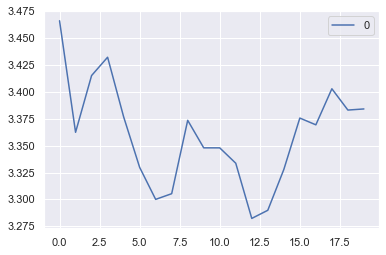

In [104]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [101]:
scaler = MinMaxScaler()
df['Density (P/Km²)']=scaler.fit_transform(df[['Density (P/Km²)']])
df['2018']=scaler.fit_transform(df[['2018']])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train=df_train[['Density (P/Km²)', '2018']]
X_test=df_test[['Density (P/Km²)', '2018']]
y3_train=df_train['Cost Per Month - Premium ($)']
y3_test=df_test['Cost Per Month - Premium ($)']
model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', metric_params=None, n_jobs=-1)
reg = model.fit(X_train, y3_train)
pred_values_tr = model.predict(X_train)
pred_values_te = model.predict(X_test)
print('****************** KNN Regression ******************')    
print("")
scoreR_te = model.score(X_test, y3_test)
print('Test Accuracy Score: ', scoreR_te)
scoreR_tr = model.score(X_train, y3_train)
print('Training Accuracy Score: ', scoreR_tr)

print('---------------------------------------------------------')

****************** KNN Regression ******************

Test Accuracy Score:  0.4670006759503321
Training Accuracy Score:  0.608733278943969
---------------------------------------------------------


In [105]:
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y3_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y3_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4.003156046587908
RMSE value for k=  2 is: 3.796393024964617
RMSE value for k=  3 is: 3.755480686301713
RMSE value for k=  4 is: 3.735657154370567
RMSE value for k=  5 is: 3.716994529634573
RMSE value for k=  6 is: 3.772748991611251
RMSE value for k=  7 is: 3.724231875330065
RMSE value for k=  8 is: 3.782618691682611
RMSE value for k=  9 is: 3.897353486345685
RMSE value for k=  10 is: 3.847418950846572
RMSE value for k=  11 is: 3.8299490750342065
RMSE value for k=  12 is: 3.8278849187754966
RMSE value for k=  13 is: 3.760635555732233
RMSE value for k=  14 is: 3.798435309350382
RMSE value for k=  15 is: 3.877203569393606
RMSE value for k=  16 is: 3.958332632949499
RMSE value for k=  17 is: 3.9251224571145378
RMSE value for k=  18 is: 3.9935487553706706
RMSE value for k=  19 is: 3.9637809585715784
RMSE value for k=  20 is: 3.9834563431146077


<AxesSubplot:>

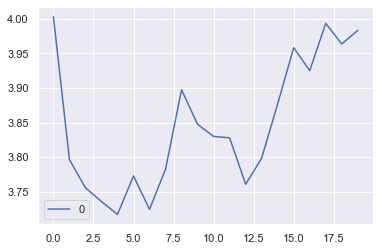

In [106]:
curve = pd.DataFrame(rmse_val)
curve.plot()